In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import copy
import scipy.misc as scpm
from collections import Counter

%matplotlib inline

In [73]:
modelar = pd.read_csv('data/Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('data/Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [74]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


# Numero de anuncios en el mismo código postal

In [75]:
num_anuncios=modelar[['HY_id','HY_cod_postal']].groupby('HY_cod_postal').count().rename(columns={'HY_id':'Num_anuncios'})
num_anuncios.head()

,Num_anuncios
HY_cod_postal,
2001,1
2006,21
2007,2
2100,1
2156,6


In [77]:
result=pd.merge(modelar, num_anuncios, how='left', on='HY_cod_postal')


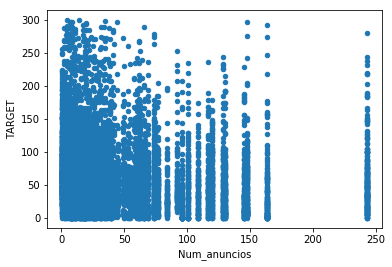

In [78]:
result[['Num_anuncios','TARGET']].loc[result[['Num_anuncios','TARGET']]['TARGET']<300].plot(x='Num_anuncios',y='TARGET',kind='scatter')

              Num_anuncios    TARGET
Num_anuncios      1.000000 -0.170931
TARGET           -0.170931  1.000000


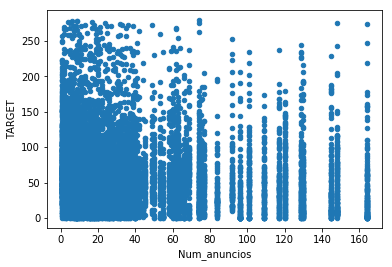

In [70]:
result[['Num_anuncios','TARGET']].loc[(result[['Num_anuncios','TARGET']]['TARGET']<280) & (result[['Num_anuncios','TARGET']]['Num_anuncios']<200)].plot(x='Num_anuncios',y='TARGET',kind='scatter')
print(result[['Num_anuncios','TARGET']].loc[(result[['Num_anuncios','TARGET']]['TARGET']<280) & (result[['Num_anuncios','TARGET']]['Num_anuncios']<200)].corr())

# Numero de anuncios en la misma provincia

In [76]:
num_anun_pro=modelar[['HY_id','HY_provincia']].groupby('HY_provincia').count().rename(columns={'HY_id':'Num_anun_pro'})
num_anun_pro.head()

,Num_anun_pro
HY_provincia,
A Coruña,16
Albacete,45
Alicante,794
Almería,1768
Asturias,1


In [80]:
result2=pd.merge(modelar, num_anun_pro, how='left', on='HY_provincia')
result2.head(3)

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET,Num_anun_pro
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16,384.0
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71,534.0
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48,794.0


              Num_anun_pro    TARGET
Num_anun_pro      1.000000  0.012018
TARGET            0.012018  1.000000


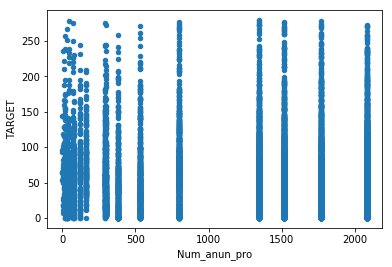

In [81]:
result2[['Num_anun_pro','TARGET']].loc[(result2[['Num_anun_pro','TARGET']]['TARGET']<280)].plot(x='Num_anun_pro',y='TARGET',kind='scatter')
print(result2[['Num_anun_pro','TARGET']].loc[(result2[['Num_anun_pro','TARGET']]['TARGET']<280)].corr())

In [112]:
#load_image without resizing
def load_images(filenames):
    images =np.asarray([scpm.imread(file, mode= 'RGB') for file in filenames])
    return images

#load_image resizing
width, height= 60,60
def load_imagesr(filenames):
    images =np.asarray([cv2.resize(scpm.imread(file, mode= 'RGB'),(width,height)) for file in filenames])
    return images

#get file names
names = sorted(glob.glob('imagenes_inmuebles_haya/*.jpg'))
import math 

lista=[]
for i in range(len(names)):
    lista.append(names[i][24:31])
    
df= pd.DataFrame(lista,columns=['HY_id'])
df['HY_id']=df['HY_id'].astype(int)
df=df.set_index('HY_id')

df2=modelar[['HY_id','TARGET']]
df2=df2.set_index('HY_id')

result=pd.merge(df, df2, how='left', on='HY_id')
result.head(10)

y=result['TARGET'].as_matrix()
print('Total:',len(y),len(names))

predict_X_names=[]
tt_X_names=[]
tt_Y=[]

for i in range(len(y)):
    if math.isnan(y[i]):
        predict_X_names.append(names[i])
    else:
        if y[i]<125:
            tt_X_names.append(names[i])
            tt_Y.append(y[i])
print('\n','For training/test:',len(tt_X_names))
print(' For predicting:',len(predict_X_names))
print(' Discarded:',len(y)-len(tt_Y)-len(predict_X_names))

Total: 47381 47381

 For training/test: 37863
 For predicting: 4745
 Discarded: 4773


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Image Size

In [128]:
#Get file size without opening

import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            return
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                return
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                return
        else:
            return
        return width*height

In [129]:
im_size=[get_image_size(tt_X_names[i]) for i in range(len(tt_X_names))]

In [130]:
im_size

[139302,
 124209,
 141006,
 136864,
 118541,
 34740,
 31648,
 12000,
 235200,
 311166,
 372416,
 480000,
 218700,
 218700,
 307200,
 218700,
 388800,
 388800,
 264000,
 61180,
 264000,
 61180,
 342732,
 214535,
 222068,
 226458,
 365752,
 210217,
 215064,
 226050,
 264000,
 288300,
 222068,
 210217,
 226458,
 215064,
 226050,
 264000,
 272000,
 272000,
 272000,
 218700,
 306656,
 192308,
 344190,
 167608,
 167608,
 167608,
 172236,
 158700,
 338520,
 158700,
 183456,
 357740,
 180500,
 151060,
 272510,
 167700,
 163100,
 162983,
 157780,
 166217,
 164851,
 356200,
 153335,
 160890,
 250274,
 327360,
 335490,
 247825,
 247515,
 237444,
 343239,
 332833,
 277840,
 337173,
 273612,
 285671,
 349353,
 336842,
 285671,
 307200,
 218700,
 218700,
 218700,
 218700,
 480000,
 388800,
 388800,
 218700,
 480000,
 480000,
 480000,
 218700,
 388800,
 480000,
 480000,
 480000,
 480000,
 388800,
 236320,
 255360,
 305442,
 305602,
 120754,
 305760,
 305760,
 363465,
 121706,
 163100,
 165312,
 15881

# Bordes count pixels

In [114]:
train_X=load_imagesr(tt_X_names)

import cv2
'''gray = cv2.cvtColor(train_X[0],cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)'''

train_X_del=train_X
train_X_edge=train_X[:,:,:,0]
for i in range(len(train_X)):
    gray = cv2.cvtColor(train_X_del[i],cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    train_X_edge[i]=edges

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


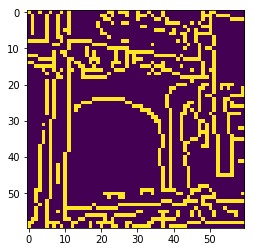

In [115]:
plt.imshow(train_X_edge[0])

In [124]:
train_X_edge[0]

array([[255,   0,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ...,   0,   0,   0],
       [255, 255,   0, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [117]:
X_train=train_X_edge/255.0

In [121]:
for i in range(5):
    print(X_train[i].sum())

832.0
687.0
861.0
1028.0
888.0


# Piscina

# Luminosidad